In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Histogram and boxplots
# Value counts
# Missing data
# Correlation between the metrics
# Explore interesting themes
    #Wealthy survive
    #By Location
    #Age scaterplot with ticket prices
    #Young and Wealthy Variable
    #Total spent
# Feature engenieering
# Preprocess data toguether or use transformer
    # Use label for train and test
# Scaling

# Model Base Line
# Model comparison with cv

In [2]:
ruta = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\data\train.csv'

In [3]:
data = pd.read_csv(ruta)

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
del data['PassengerId']

In [13]:
df =data.copy()

In [7]:
col_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
col_categoricas

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [14]:
col_discretos = df.select_dtypes(include=['int','float']).columns.tolist()

In [15]:
col_discretos

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Plot

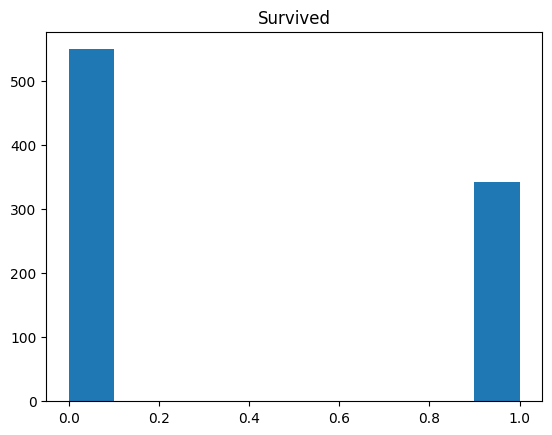

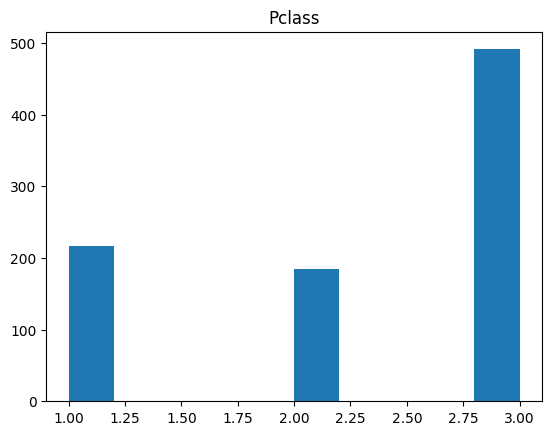

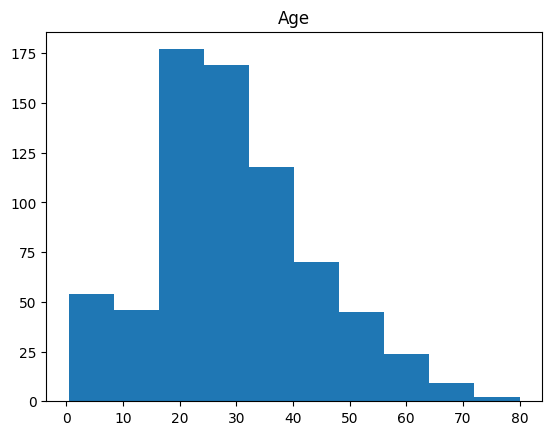

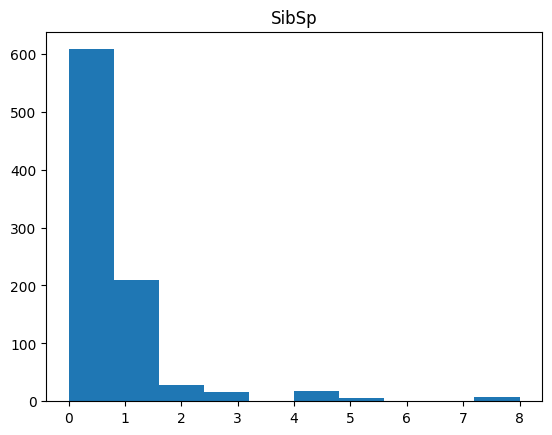

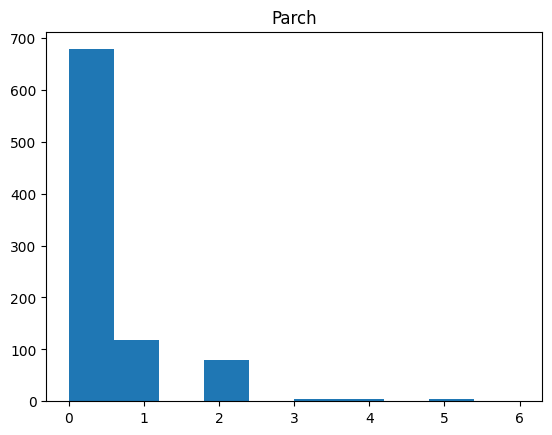

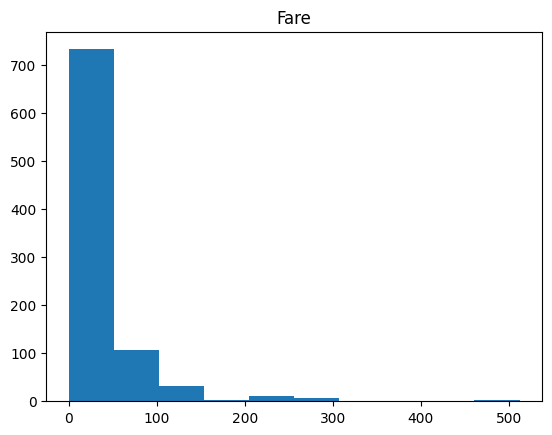

In [16]:
for i in col_discretos:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

<Axes: >

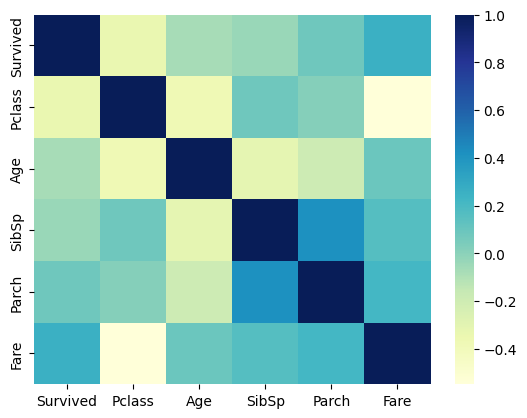

In [17]:
sns.heatmap(df[col_discretos].corr(), cmap='YlGnBu')

In [18]:
pd.pivot_table(df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


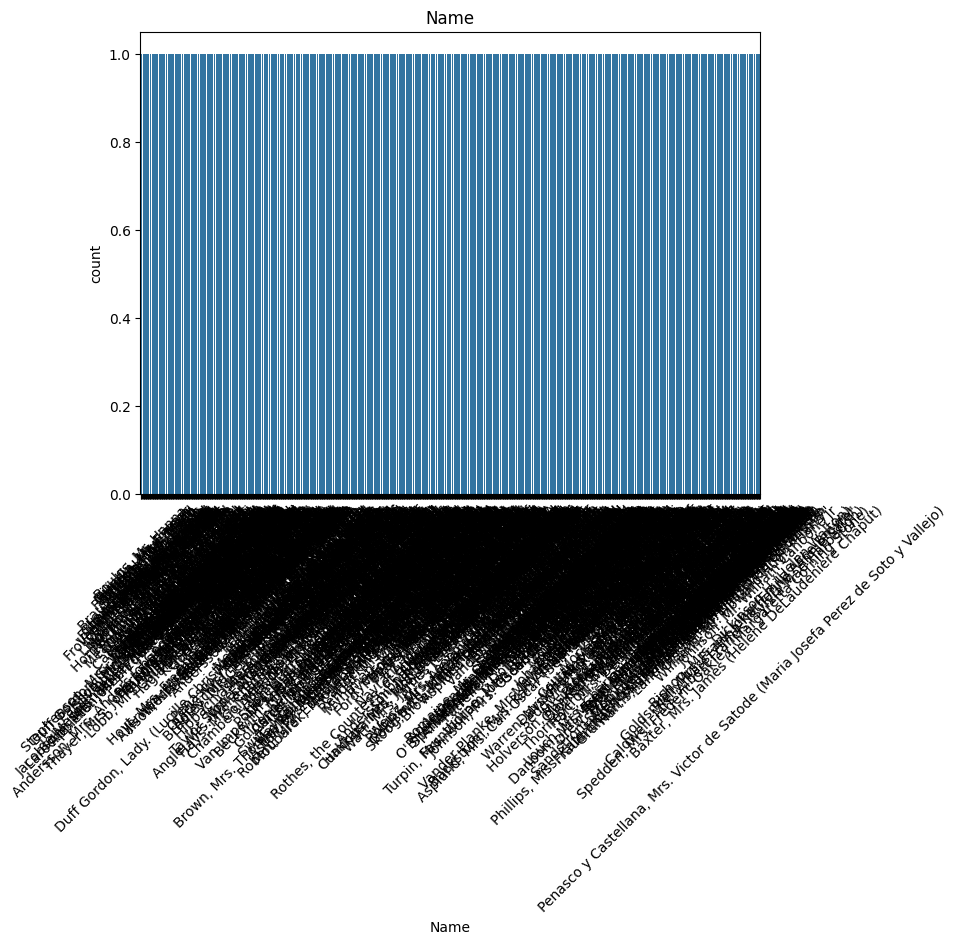

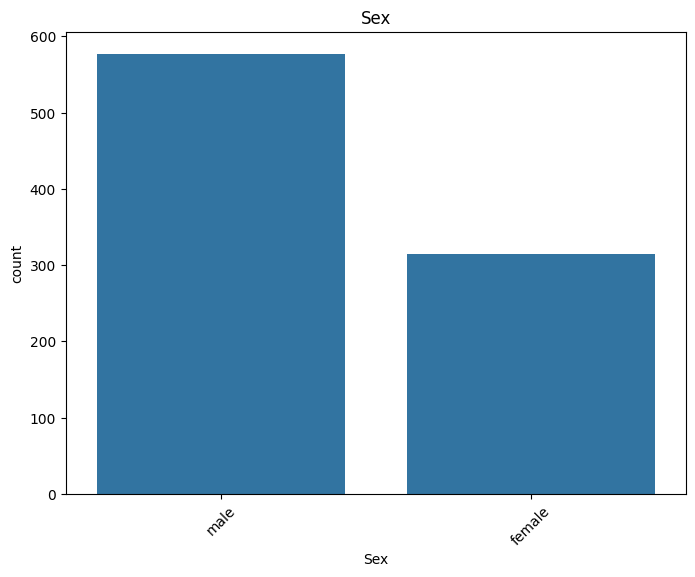

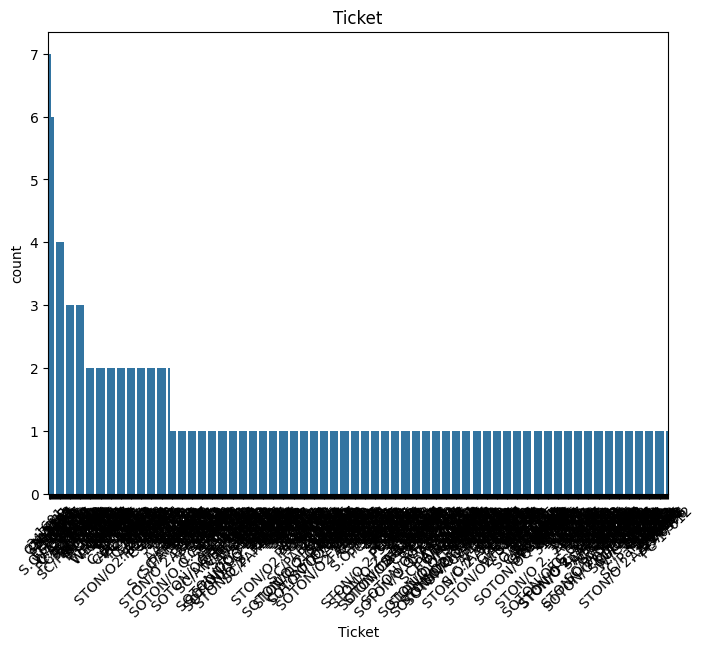

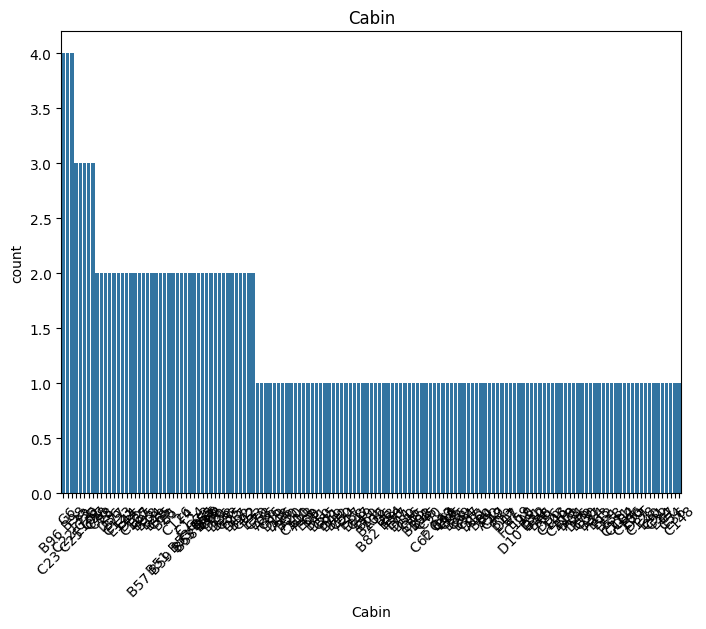

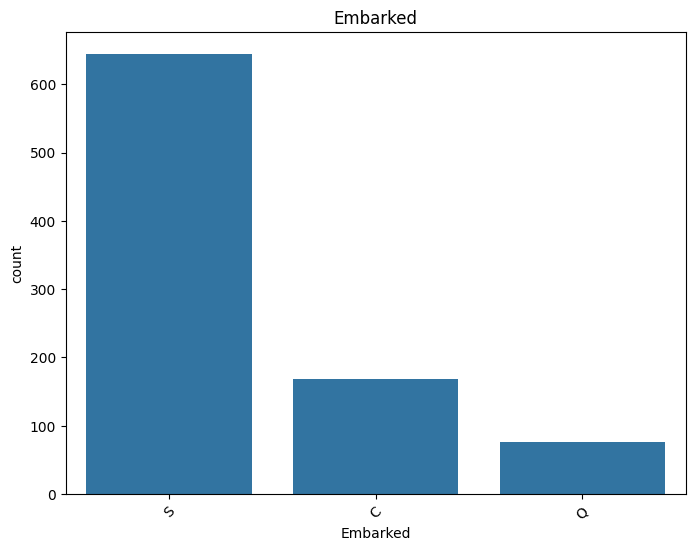

In [20]:
for i in col_categoricas:
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts())
    plt.title(i)
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
    plt.show()
    

#### Feature Engineering

In [25]:
df['cabim_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# I create a category by letter and number.

In [26]:
df['cabim_multiple'].value_counts()

cabim_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [27]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [28]:
df.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [29]:
pd.pivot_table(df, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Passager that don't have an assignated cabin has a greater dead number.

In [30]:
#Ticket analysis
df['numeric_tiket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['letters_tiket']  = df.Ticket.apply(lambda x: ' '.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [31]:
df.letters_tiket.value_counts()

letters_tiket
0             665
pc             60
ca             41
a5             21
sotonoq        15
stono 2        12
scparis        11
wc             10
a4              7
stono2          6
soc             6
fcc             5
c               5
wep             3
sopp            3
pp              3
swpp            2
sotono2         2
scah            2
ppp             2
scow            1
sp              1
sc              1
fa              1
as              1
scah basle      1
sop             1
fc              1
sca4            1
casoton         1
Name: count, dtype: int64

In [32]:
pd.pivot_table(df, index='Survived',
               columns='letters_tiket',
               values='Ticket',
               aggfunc='count')

letters_tiket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,sop,sopp,sotono2,sotonoq,sp,stono 2,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,13.0,1.0,7.0,3.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,NaN,5.0,3.0,2.0,1.0,1.0


In [33]:
#column name
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [34]:
df.name_title.value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

#### Valores NAN

In [35]:
df.Age = df.Age.fillna(df.Age.mean())
df.Fare = df.Fare.fillna(df.Fare.mean())

In [36]:
#Embarked has 4 nan values . I will doop them
df.dropna(subset=['Embarked'], inplace=True)

#### Norm

In [37]:
import numpy as np

In [38]:
df['norm_fare'] = np.log(df.Fare + 1) #+1 Para sacar valores negativos

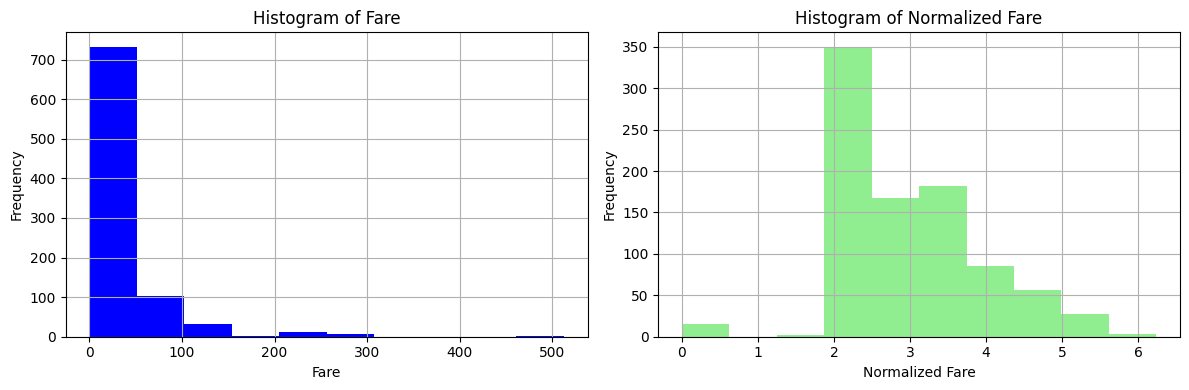

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Graficar el histograma de 'Fare' en el primer subplot
df.Fare.hist(ax=axes[0], color='blue', bins=10)
axes[0].set_title('Histogram of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Graficar el histograma de 'norm_fare' en el segundo subplot
df.norm_fare.hist(ax=axes[1], color='lightgreen', bins=10)
axes[1].set_title('Histogram of Normalized Fare')
axes[1].set_xlabel('Normalized Fare')
axes[1].set_ylabel('Frequency')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Name            889 non-null    object 
 3   Sex             889 non-null    object 
 4   Age             889 non-null    float64
 5   SibSp           889 non-null    int64  
 6   Parch           889 non-null    int64  
 7   Ticket          889 non-null    object 
 8   Fare            889 non-null    float64
 9   Cabin           202 non-null    object 
 10  Embarked        889 non-null    object 
 11  cabim_multiple  889 non-null    int64  
 12  cabin_adv       889 non-null    object 
 13  numeric_tiket   889 non-null    int64  
 14  letters_tiket   889 non-null    object 
 15  name_title      889 non-null    object 
 16  norm_fare       889 non-null    float64
dtypes: float64(3), int64(6), object(8)
memor

Dropp processed columns : Cabin, Ticket, Name, Fare

In [49]:
del df['Name']
del df['Fare']
del df['Ticket']
del df['Cabin']

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Sex             889 non-null    object 
 3   Age             889 non-null    float64
 4   SibSp           889 non-null    int64  
 5   Parch           889 non-null    int64  
 6   Embarked        889 non-null    object 
 7   cabim_multiple  889 non-null    int64  
 8   cabin_adv       889 non-null    object 
 9   numeric_tiket   889 non-null    int64  
 10  letters_tiket   889 non-null    object 
 11  name_title      889 non-null    object 
 12  norm_fare       889 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


In [53]:
df['letters_tiket'] = df['letters_tiket'].astype('string')

In [51]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\titanic\titanic\data\clean\extra_clean.parquet'

In [54]:
df.to_parquet(path)
